# Scikit-Learn

<!--<badge>--><a href="https://colab.research.google.com/github/computiq-training/Machine_Learning_for_Climate_Change/blob/main/Week 03 Intro to Machine Learning/1- Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

[Scikit-learn](http://scikit-learn.org/stable/) is a python-based machine learning library providing implementations of a great many algorithms for supervised and unsupervised learning. In large part, it builds upon the cabilities of NumPy, SciPy, matplotlib, and Pandas.

In the context of supervised learning, the primary objects scikit-learn defines are called **estimators**. Each of these defines a `fit` method, which develops a model from provided training data, and a `predict` method, which uses the model to map a new instance to a suitable target value. Scikit-learn also defines multiple utilities for partitioning and manipulating data sets as well as evaluating models.

Below, we cover some of the basic steps needed to create a model in scikit-learn.  These notes are based on material appearing in the *scikit-learn tutorials*.

*  [Tutorial](https://scikit-learn.org/stable/user_guide.html)
*  [Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

In [2]:
import numpy as np
import pandas as pd

from sklearn import (
    datasets,
    model_selection,
    linear_model,
    preprocessing,
)


# Sklearn Datasets Module 

The sklearn. datasets package embeds some small toy datasets as introduced in the Getting Started section. This package also features helpers to fetch larger datasets commonly used by the machine learning community to benchmark algorithms on data that comes from the 'real world'.

    load_boston()	Load and return the boston house-prices dataset (regression).
    load_iris()	Load and return the iris dataset (classification).
    load_diabetes()	Load and return the diabetes dataset (regression).
    load_digits()	Load and return the digits dataset (classification).
    load_linnerud()	Load and return the linnerud dataset (multivariate regression).
    load_wine()	Load and return the wine dataset (classification).
    load_breast_cancer()	Load and return the breast cancer wisconsin dataset (classification).

The iris dataset is loaded below, and a description of it is printed.

In [ ]:
# Load the iris dataset 
iris_dataset = datasets.load_iris()
# Show the iris dataset information 
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We can also use `iris_dataset.data` and `iris_dataset.targets` to create or x & y (inputs & outputs) pairs that will be used for training and testing

In [ ]:
# Create dataframe for features from the dataset data with the features names 
x = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
# Create the dataframe for the target the
y = pd.DataFrame(iris_dataset.target, columns=["Labels"])



In [ ]:
# Show x 
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e07f948d0>,
      dtype=object)

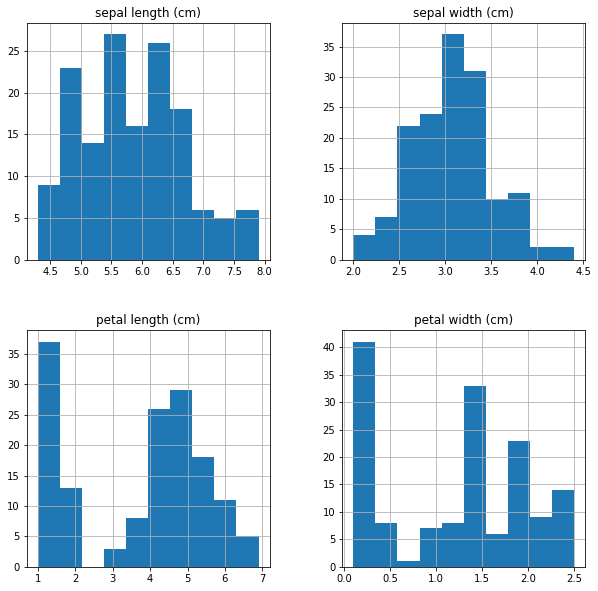

In [ ]:
# Plot the histogram for x 
x.hist(figsize=(10,10))

In [ ]:
# Show y 
y

,Labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# Sklearn Preprocessing Module
The preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators. In general, learning algorithms benefit from standardization of the data set.


## Standardization, or mean removal and variance scaling
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

The `preprocessing` module provides the `StandardScaler` utility class, which is a quick and easy way to perform the following operation on an array-like dataset:

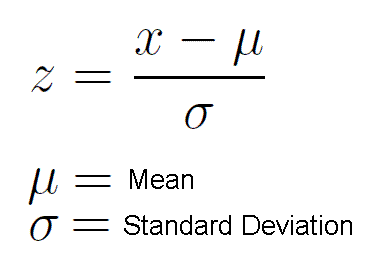

In [ ]:
# First of all call the stander scaler class
scaler = preprocessing.StandardScaler()
# Use the fit method to get mean and std from the dataset 
scaler.fit(x)
# Apply the stander scaler transformation on the dataset 
x_scaler = scaler.transform(x)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e087fe350>,
      dtype=object)

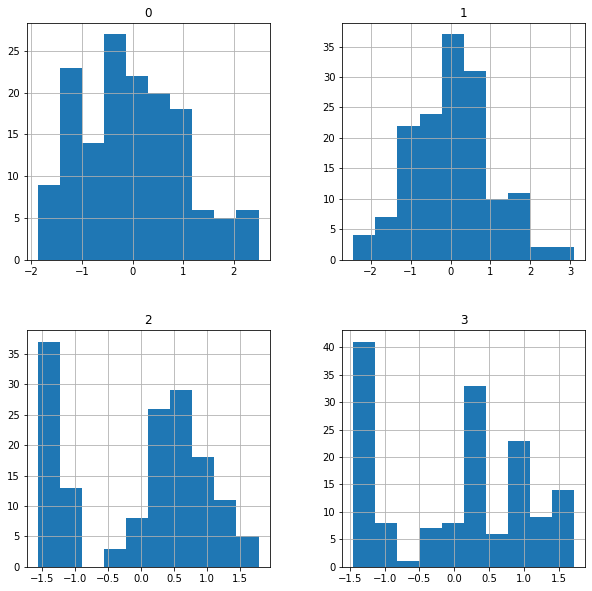

In [ ]:
# Plot the histogram for x_scaler 
pd.DataFrame(x_scaler).hist(figsize=(10,10))

We can see the stander scaler effects on the dataset by make the mean 0 and std 1

In [ ]:
print(f"""
      x  mean = {np.mean(x,axis=0)}
      x  std = {np.std(x,axis=0)}""")


      x  mean = sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
      x  std = sepal length (cm)    0.825301
sepal width (cm)     0.434411
petal length (cm)    1.759404
petal width (cm)     0.759693
dtype: float64


In [ ]:
print(f"""
      x scaler mean = {np.mean(x_scaler,axis=0)}
      x scaler std = {np.std(x_scaler,axis=0)}""")


      x scaler mean = [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
      x scaler std = [1. 1. 1. 1.]


##  Scaling Features to a Range

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using `MinMaxScaler` or `MaxAbsScaler`, respectively.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

Here is an example to scale a toy data matrix to the [0, 1] range using `MinMaxScaler`:


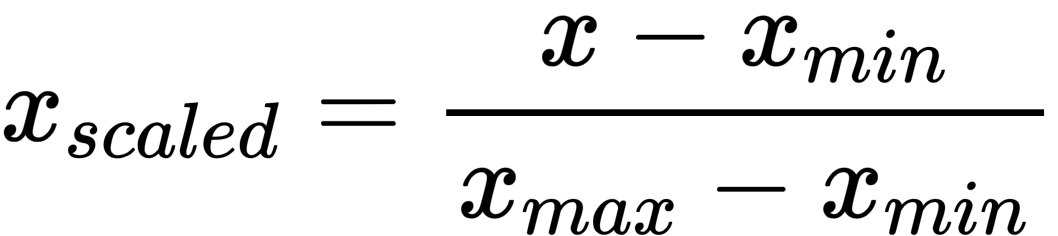

In [ ]:
# First of all call the   scaler class
scaler = preprocessing.MinMaxScaler()
# Use the fit method to get min and max from the dataset 
scaler.fit(x)
# Apply the min max scaler transformation on the dataset 
x_scaler = scaler.transform(x)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e0758bed0>,
      dtype=object)

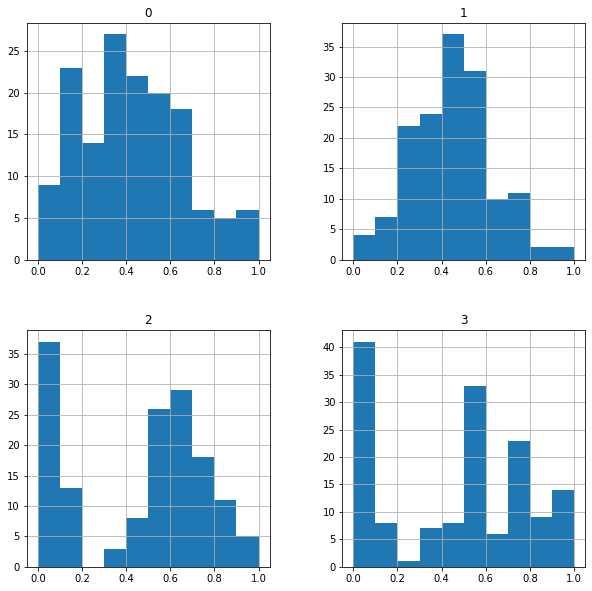

In [ ]:
# Plot the histogram for x_scaler 
pd.DataFrame(x_scaler).hist(figsize=(10,10))

We can see the min max scaler effects on the dataset by make scaling the dataseet values between [0-1]

In [ ]:
print(f"""
      x  min = {np.min(x,axis=0)}
      x  max = {np.max(x,axis=0)}""")


      x  min = sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64
      x  max = sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64


In [ ]:
print(f"""
      x  min = {np.min(x_scaler,axis=0)}
      x  max = {np.max(x_scaler,axis=0)}""")


      x  min = [0. 0. 0. 0.]
      x  max = [1. 1. 1. 1.]


# Train/Test Split

In order to validate that our model can generalize to data that it wasn't trained on, it's necessary to create a sperate **testing dataset** that will not be used in training.

Within the `model_selection` submodule of Scikit Learn, there's the `train_test_split` that we can use to automatically split the data into training and testing pairs.

Here's an explanation of the different parameters taken directly from the function's docstring

#### **Parameters**

**arrays** : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

**test_size** : float, int or None, optional (default=None)
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If train_size is also None, it will
    be set to 0.25.

**train_size** : float, int, or None, (default=None)
    If float, should be between 0.0 and 1.0 and represent the
    proportion of the dataset to include in the train split. If
    int, represents the absolute number of train samples. If None,
    the value is automatically set to the complement of the test size.

**random_state** : int, RandomState instance or None, optional (default=None)
    If int, random_state is the seed used by the random number generator;
    If RandomState instance, random_state is the random number generator;
    If None, the random number generator is the RandomState instance used
    by np.random.

**shuffle** : boolean, optional (default=True)
    Whether or not to shuffle the data before splitting. If shuffle=False
    then stratify must be None.

**stratify** : array-like or None (default=None)
    If not None, data is split in a stratified fashion, using this as
    the class labels.






In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42 , stratify=y
)

## Stratification

Stratified sampling is a sampling technique where the samples are selected in the same proportion (by dividing the population into groups called 'strata' based on a characteristic) as they appear in the population.


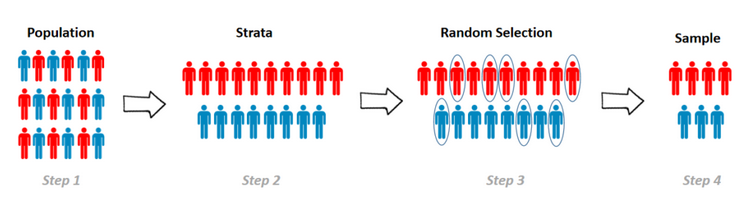

Please note that the `stratify` parameter works only in the context of classification tasks where there are a fixed amount of possible outputs/targets

# Fitting and predicting: estimator basics

Scikit-learn provides dozens of built-in machine learning algorithms and models, called estimators. Each estimator can be fitted to some data using its fit method.


## Sklaern Linear Models Module


The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation, if y_hot
 is the predicted value.

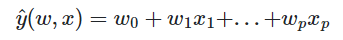

### Linear Regression
In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

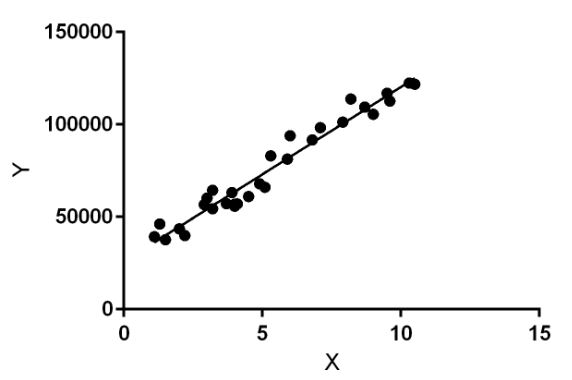


Here is a simple example where we fit a Linear Regression on simple dataset about adding opportunities :

We will create simple linear model to understand the adding opportunities  
the data will be x1 the left side x2 the right side and the label will be x1+x2 
the machine learning model will learning how to map from x1,x2 to label

#### Create Dataset 

In [3]:
# Create the dataset 
# x1 equal the left value 
x1 = np.random.randint(low=0,high=1000,size =(1000))
# x2 equal the right value 
x2  = np.random.randint(low=0,high=1000,size =(1000))
# Create the features DataFrame
features = pd.DataFrame({'x1':x1,
                         'x2':x2})
# Create target from x1+x2 
y = x1+x2 

#### Normalize the dataset 
We will using the MinMaxScaler for the features and targets 

Note: in regression task we should normalize the target values but in classification we don't normalize the target because it's representing the classs number.


In [4]:
# First of all call the   MinMaxScaler class
x_normalizer = preprocessing.MinMaxScaler()
# Use the fit method to get min and max from the features 
x_normalizer.fit(features)
# Apply the min max scaler transformation on the features 
x_scaler = x_normalizer.transform(features)


In [5]:
# First of all call the   MinMaxScaler class
y_normalizer = preprocessing.MinMaxScaler()
# Use the fit method to get min and max from the target 
y_normalizer.fit(y.reshape(-1,1))
# Apply the min max scaler transformation on the target 
y_scaler = y_normalizer.transform(y.reshape(-1,1))


#### Split the data to train and test 

In [6]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_scaler, y_scaler, test_size=0.2, random_state=42,
)

#### Create and Train the Model 

In [7]:
# Create the linear regression model
model = linear_model.LinearRegression()
# train the model on the training dataset 
model.fit(x_train,y_train)


LinearRegression()

The `fit` method generally accepts 2 inputs:

1. The samples matrix (or design matrix) X. The size of X is typically (n_samples, n_features), which means that samples are represented as rows and features are represented as columns.

2. The target values y which are real numbers for regression tasks, or integers for classification (or any other discrete set of values). For unsupervized learning tasks, y does not need to be specified. y is usually 1d array where the i th entry corresponds to the target of the i th sample (row) of X.

Both X and y are usually expected to be numpy arrays or equivalent array-like data types, though some estimators work with other formats such as sparse matrices.

Once the estimator is fitted, it can be used for predicting target values of new data. You don’t need to re-train the estimator:

In [9]:
new_inputs = [[10, 5]] # the input shape should be (s,f)

new_inputs = x_normalizer.transform(new_inputs)# Normalize the input data 

print(f"Show the normalized input: {new_inputs}")


pred= model.predict(new_inputs)  # make prediction on the new dataset 

print(f"prediction  before inverse transform:{pred}")

pred = y_normalizer.inverse_transform(pred) # inverse transformation on the prediction values because it's normalized 

print(f"prediction :{pred}")

Show the normalized input: [[0.01002004 0.00401606]]
prediction  before inverse transform:[[-0.01206716]]
prediction :[[15.]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


### Now Let's Work with Linear Regression on Real Dataset

In statistics, linear regression is a linear approach to modelling the relationship between a set a features, and a desired output. The case of one input feature is called simple linear regression; for more than one, the process is called multiple linear regression.

Scikit Learn defines this algorithm in `LinearRegression` class as a part of the `linear_models` module.


#### Download the dataset using kaggle

In [10]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download -d rohanrao/air-quality-data-in-india

 78% 57.0M/72.9M [00:00<00:00, 154MB/s]
100% 72.9M/72.9M [00:00<00:00, 152MB/s]


In [12]:
!unzip /content/air-quality-data-in-india.zip

Archive:  /content/air-quality-data-in-india.zip
  inflating: city_day.csv            
  inflating: city_hour.csv           
  inflating: station_day.csv         
  inflating: station_hour.csv        
  inflating: stations.csv            


#### Load the Dataset

In [13]:
# Read the data using pandas 
data=pd.read_csv('/content/city_hour.csv')
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


#### Preprocessing the Dataset

In [ ]:
# Drop the following columns
#['City','Datetime','AQI_Bucket']
data.drop(columns=['City','Datetime','AQI_Bucket'],inplace =True)


In [ ]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN
1,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN
2,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN
3,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN
4,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0
707871,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0
707872,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0
707873,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0


In [ ]:
# Drop the missing values 
data.dropna(inplace=True)

In [ ]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000
mean,63.920899,128.279759,18.108749,32.815853,34.225690,21.820122,1.030950,11.281448,36.352084,3.912114,11.344988,2.566608,145.405873
std,62.152594,99.378185,28.985743,23.036079,35.307825,18.102877,1.572615,10.353600,27.687567,5.858445,15.042199,5.346189,97.011021
min,0.030000,1.000000,0.010000,0.100000,0.000000,0.010000,0.000000,0.010000,0.020000,0.000000,0.000000,0.000000,18.000000
25%,27.000000,63.750000,3.560000,15.420000,13.410000,10.320000,0.430000,5.500000,16.770000,0.940000,2.350000,0.220000,79.000000
50%,47.500000,101.500000,8.240000,27.200000,22.970000,15.350000,0.700000,8.830000,28.220000,2.250000,6.200000,1.000000,114.000000
75%,76.500000,157.400000,17.820000,44.100000,40.180000,29.560000,1.070000,13.600000,48.600000,4.560000,13.940000,2.690000,176.000000
max,999.990000,1000.000000,419.780000,266.730000,408.250000,485.520000,31.620000,199.930000,219.780000,120.080000,198.050000,261.950000,760.000000


In [ ]:
# split the dataset to x,y 
x= data.drop(columns=['AQI'])
y=data.AQI.to_numpy()

#### Normalize the dataset 
We will using the MinMaxScaler for the features and targets 

Note: in regression task we should normalize the target values but in classification we don't normalize the target because it's representing the classs number.


In [ ]:
# First of all call the   StandardScaler class
x_normalizer = preprocessing.StandardScaler()
# Use the fit method to get mean and std from the features 
x_normalizer.fit(x)
# Apply the StandardScaler transformation on the features 
x_norm = x_normalizer.transform(x)


In [ ]:
# First of all call the   MinMaxScaler class
y_normalizer = preprocessing.MinMaxScaler()
# Use the fit method to get min and max from the target 
y_normalizer.fit(y.reshape(-1,1))
# Apply the min max scaler transformation on the target 
y_norm = y_normalizer.transform(y.reshape(-1,1))


Second, we split the data into 90/10 training/testing split (90% of the data will be used for training while 10% will be used for testing)

#### Split the dataseet to training and testing

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y_norm.reshape(-1), test_size=0.1, random_state=42
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116349, 12), (12928, 12), (116349,), (12928,))

Third, we train (i.e. `fit`) the model using the training dataset (`x_train` as inputs, `y_train` as targets)

In [ ]:
regressor = linear_model.LinearRegression() # initialize the parameter of linear  regression model
regressor.fit(x_train, y_train)  # training the model on the train data

# we can preview the learned coefficients (i.e. weights) and intercept (i.e. bias)

print("Weights:\n", regressor.coef_)
print("Bias:\n", regressor.intercept_)

Weights:
 [ 0.05046532  0.04495655 -0.01662162 -0.00364791  0.026818    0.01129532
  0.01596527 -0.00287826  0.02141653 -0.00501406 -0.00033337 -0.00261014]
Bias:
 0.1716384001910888


####  Model Evaluation 

we wil use the score method to evalute the model performance using R2 score.
r2 score? it "the proportion of the variance in the dependent variable that is predictable from the independent variable(s).” Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all.

In [ ]:
regressor.score(x_test,y_test)

0.7623292276029228

## Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.


Scikit Learn defines this algorithm in `LogisticRegression` class as a part of the `linear_models` module.


#### Download the Dataset

In [ ]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 38.2MB/s]


In [ ]:
!unzip /content/crop-recommendation-dataset.zip

Archive:  /content/crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


#### Load the Data

In [ ]:
dataset = pd.read_csv('/content/Crop_recommendation.csv')
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#### Preprocessing the Dataset

In [ ]:
# Create tokenizer function to convert the labels to numerical values
def tokenizer(col):
    word_id={}
    id_word = {}
    for id,word in enumerate(col.unique()):
        word_id[word]=id 
        id_word[id] = word
    return word_id,id_word


In [ ]:
# Get the label to id and id to label dictdictionary 
label_id,id_label = tokenizer(dataset.label)
# Convert the labels to ids using the label_id dictionary 
dataset.label.replace(label_id,inplace=True)

In [ ]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21


In [ ]:
# Split the dataset to x,y 
x = dataset.drop(columns=['label'])
y = dataset.label

#### Normalize the dataset 
We will using the MinMaxScaler for the features and targets 

Note: in regression task we should normalize the target values but in classification we don't normalize the target because it's representing the classs number.


In [ ]:
# First of all call the   StandardScaler class
x_normalizer = preprocessing.StandardScaler()
# Use the fit method to get mean and std from the features 
x_normalizer.fit(x)
# Apply the StandardScaler transformation on the features 
x_norm = x_normalizer.transform(x)


#### Split the dataset to training and testing

Second, we split the data into 90/10 training/testing split (90% of the data will be used for training while 10% will be used for testing)

Since this is a classification problem (we only have two possible outputs, 1 or 0), we can use the `stratify` parameter to ensure that the two possible output values are distributed proportionally between the training and testing sets and preserve the data's original distribution across the two sets.

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y, test_size=0.1, random_state=42, stratify=y
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1980, 7), (220, 7), (1980,), (220,))

#### Create and Train the Model

Third, we train (i.e. `fit`) the model using the training dataset (`x_train` as inputs, `y_train` as targets)

In [ ]:
classifier = linear_model.LogisticRegression()
classifier.fit(x_train, y_train)

# we can preview the learned coefficients (i.e. weights) and intercept (i.e. bias)

print("Weights:\n", classifier.coef_)
print("Bias:\n", classifier.intercept_)

####  Model Evaluation 

Finally, we'll evaluate the predicted output against the ground-truth values in `y_test` using score method

One of the most used metrics to evaluate classification models is `accuracy_score` which calculates the precentage of the examples that the trained classifier guessed correctly


In [ ]:
classifier.score(x_test,y_test)

0.9863636363636363

# Pipeline 
Scikit-learn's pipeline class is a useful tool for encapsulating multiple different transformers alongside an estimator into one object, so that you only have to call your important methods once Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit.

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’, as in the example below.


Parameters:	
1. `steps`:
List of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.

[Read more.](https://scikit-learn.org/stable/modules/compose.html)

In [ ]:
# Import the sklearn pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# Download the dataset 
x, y = datasets.load_breast_cancer(return_X_y=True)
# Split the dataset to train and test 
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.1, random_state=42, stratify=y
)

In [ ]:
# Create the sklearn pipeline 
pipe = Pipeline([('scaler', preprocessing.StandardScaler()),
                 ('Logistic_R', linear_model.LogisticRegression())])

# fit the pipeline 
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic_R', LogisticRegression())])

**Notes**
Calling `fit` on the pipeline is the same as calling `fit` on each estimator in turn, transform the input and pass it on to the next step. The pipeline has all the methods that the last estimator in the pipeline has, i.e. if the last estimator is a classifier, the Pipeline can be used as a classifier. If the last estimator is a transformer, again, so is the pipeline.

In [ ]:
# Calculate the Accuracy of the model
pipe.score(x_test, y_test)

0.9649122807017544